In [1]:
# Version: 0.1
# Date: 21 Oct 2023
# Author: Sathish Balachandran

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def loss_calc(x, y, z, theta, thetazero):
    """function to calculate the error ratio
       based on hyperplane parameters - theta and thetazero
    """
    loss_val = 0
    for i in range(len(x)):
        # predicting y based on theta and thetazero
        y_pred = theta * x[i] + thetazero
        
        # classfier based on prediction
        z_pred = 1 if y[i] >= y_pred else -1
        
        # sum all the error count
        if z[i] != z_pred:
            loss_val += 1
    return loss_val/len(x)

In [4]:
def random_linear_classifier(x, y, z, k):
    """
    """
    theta, thetazero, losses = [], [], []
    for j in range(k):
        # generate random values for theta and thetazero
        theta_temp = np.random.uniform(-5,5)
        thetazero_temp = np.random.uniform(-5,5)
        
        # keep track of the parameters and calculated loss values
        theta.append(theta_temp)
        thetazero.append(thetazero_temp)
        losses.append(loss_calc(x, y, z, theta_temp, thetazero_temp))
    
    # findiing the minimum loss and its index
    loss_min = min(losses)
    min_index = losses.index(loss_min)
    
    # return corresponding theta and thetazero for the minimum loss
    return theta[min_index], thetazero[min_index], loss_min

In [5]:
# generate x and y values i.e inputs
np.random.seed(0)
x = np.linspace(0, 200, 400)
y_true = x + 3
y = y_true + np.random.normal(0, 100, len(x))

In [6]:
# classifier based on sample hyperplane (here it is line)
z = np.where(y >= x+3, 1, -1)
x1, x2, y1, y2, z1, z2 = [], [], [], [], [], []

# seperate the data based on classifier
for i in range(len(x)):
    if y[i] >= x[i]+3:
        x1.append(x[i])
        y1.append(y[i])
        z1.append(1)
    else:
        x2.append(x[i])
        y2.append(y[i])
        z2.append(-1)

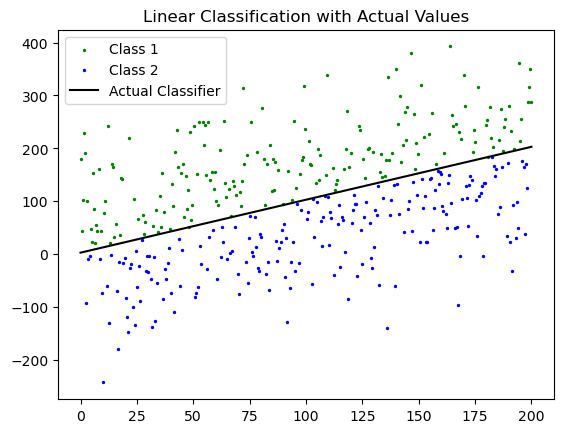

In [7]:
# plotting the original values
plt.figure()
plt.scatter(x1, y1, color='green', s=2, label='Class 1')
plt.scatter(x2, y2, color='blue', s=2, label='Class 2')
plt.plot(x, y_true, color='black', label='Actual Classifier')
plt.title('Linear Classification with Actual Values')
plt.legend()
plt.show()

In [8]:
# calculating parameters for hyper parameter (last argument)
theta, thetazero, loss_min = random_linear_classifier(x, y, z, 10)

In [9]:
# predicted y values based on linear parameters
yp = theta * x + thetazero

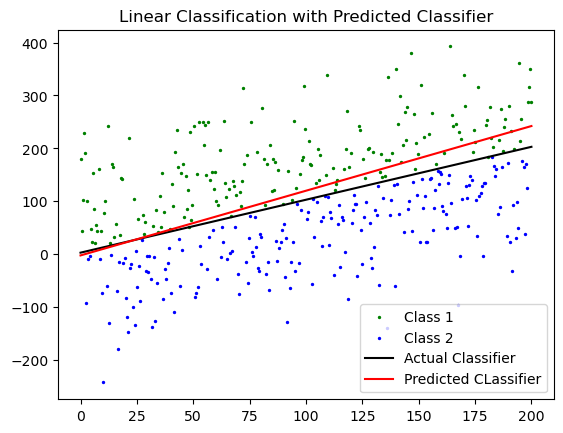

In [10]:
# plotting the original values along with predicted classifier
plt.figure()
plt.scatter(x1, y1, color='green', s=2, label='Class 1')
plt.scatter(x2, y2, color='blue', s=2, label='Class 2')
plt.plot(x, y_true, color='black', label='Actual Classifier')
plt.plot(x, yp, color='red', label='Predicted CLassifier')
plt.title('Linear Classification with Predicted Classifier')
plt.legend()
plt.show()

In [11]:
# calculating the losses for n times
losses = []
k = np.arange(1, 501)
for i in k:
    theta, thetazero, loss_min = random_linear_classifier(x, y, z, i)
    losses.append(loss_min)

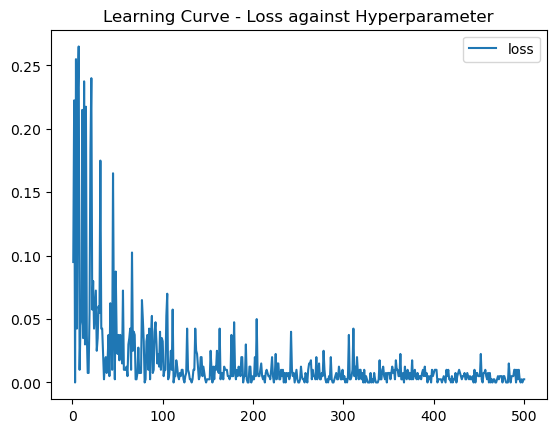

In [12]:
# plotting the minimum loss against hyperparameter
plt.figure()
plt.plot(k ,losses, label='loss')
plt.title('Learning Curve - Loss against Hyperparameter')
plt.legend()
plt.show()